In [1]:
import sys
from pathlib import Path
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectFromModel

sys.path.append(str(Path("../../..").resolve()))

from src.constants import model_data_dir
from src.utils import use_target

In [2]:
df_train = pd.read_csv(model_data_dir / "train_regression.csv").drop(["sc_1d_fwd_rel_ret", "mom_1d_fwd_rel_ret", "year", "month", "day", "weekday"], axis=1)
df_test =  pd.read_csv(model_data_dir / "test_regression.csv").drop(["sc_1d_fwd_rel_ret", "mom_1d_fwd_rel_ret", "year", "month", "day", "weekday"], axis=1)
test_dates = df_test["date"]
train_dates = df_train["date"]
df_all = pd.concat([df_train, df_test], axis=0)
df_all = use_target(df_all, "value_1d_fwd_rel_ret", "regression", next_day=True, split=False)
all_dates = df_all["date"]
df_all

,date,vix,v2x,move,gold_vol,jpm_global_fx_vol,jpm_g7_fx_vol,jpm_em_fx_vol,eurusd_1m_vol,usdjpy_1m_vol,...,jpm_em_fx_vol_rolling_40,eurusd_1m_vol_rolling_40,usdjpy_1m_vol_rolling_40,usd_libor_swaption_vol_rolling_40,s&p_500_vrp_rolling_40,s&p_500_skew_rolling_40,eurusd_risk_reversal_rolling_40,usdjpy_risk_reversal_rolling_40,eurjpy_risk_reversal_rolling_40,value_1d_fwd_rel_ret_next
0,2000-07-26,-0.0226,-0.2983,0.0747,5.5753,0.1500,0.4597,-0.8472,0.4775,0.2698,...,-0.0497,1.0356,-0.1011,-0.6162,-1.0756,-0.9061,-0.1720,-0.0739,-0.1431,0.008058
1,2000-07-27,-0.0305,-0.2380,0.0163,-0.5778,0.1500,0.4636,-0.8599,0.3823,0.2698,...,-0.0548,0.9875,-0.0869,-0.6162,-1.0756,-0.9010,-0.1641,-0.0797,-0.1337,0.002946
2,2000-07-28,0.1082,-0.1096,-0.0001,-0.5762,0.1591,0.4715,-0.8281,0.4299,0.2859,...,-0.0603,0.9625,-0.0657,-0.6155,-1.0756,-0.9067,-0.1594,-0.0836,-0.1255,0.001585
3,2000-07-31,0.0970,-0.1392,0.0317,-0.5667,0.1771,0.4991,-0.8440,0.4934,0.3020,...,-0.0614,0.8569,-0.0514,-0.6148,-1.0756,-0.9030,-0.1594,-0.0877,-0.1182,0.000119
4,2000-08-01,0.0758,-0.1185,0.0410,0.3463,0.1681,0.4873,-0.8440,0.4299,0.2859,...,-0.0605,0.8080,-0.0462,-0.6148,-1.0756,-0.8965,-0.1565,-0.0921,-0.1117,0.003099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,2021-06-22,-0.3592,-0.6012,-0.8797,-0.3285,-0.9148,-1.3899,-0.4180,-1.2354,-1.4188,...,-0.3496,-0.7680,-0.8720,-0.2174,-0.3185,1.2918,-0.3044,-0.2642,-0.2623,0.002205
1881,2021-06-23,-0.3973,-0.5048,-0.9773,-0.3708,-0.9238,-1.3978,-0.4371,-1.2767,-1.3705,...,-0.3592,-0.7706,-0.8721,-0.2271,-0.2997,1.2750,-0.3042,-0.2647,-0.2623,0.001267
1882,2021-06-24,-0.4364,-0.6231,-1.0020,-0.4011,-0.9809,-1.4609,-0.5261,-1.3521,-1.4767,...,-0.3595,-0.7618,-0.8621,-0.2272,-0.2850,1.3357,-0.3040,-0.2647,-0.2620,-0.004250
1883,2021-06-25,-0.4755,-0.6893,-0.9780,-0.4344,-1.0321,-1.5358,-0.5579,-1.4100,-1.5306,...,-0.3543,-0.7471,-0.8440,-0.1956,-0.2844,1.5878,-0.3039,-0.2647,-0.2618,-0.003608


In [5]:
df_all.query("date == '2021-06-09'")

,date,vix,v2x,move,gold_vol,jpm_global_fx_vol,jpm_g7_fx_vol,jpm_em_fx_vol,eurusd_1m_vol,usdjpy_1m_vol,...,jpm_em_fx_vol_rolling_40,eurusd_1m_vol_rolling_40,usdjpy_1m_vol_rolling_40,usd_libor_swaption_vol_rolling_40,s&p_500_vrp_rolling_40,s&p_500_skew_rolling_40,eurusd_risk_reversal_rolling_40,usdjpy_risk_reversal_rolling_40,eurjpy_risk_reversal_rolling_40,value_1d_fwd_rel_ret_next
1871,2021-06-09,-0.2217,-0.6349,-1.0659,-0.4608,-0.9839,-1.4648,-0.5293,-1.3116,-1.4107,...,-0.3108,-0.8795,-0.9681,-0.1431,-0.3979,0.3659,-0.3141,-0.2572,-0.2574,0.001558


In [3]:
df_train

,date,vix,v2x,move,gold_vol,jpm_global_fx_vol,jpm_g7_fx_vol,jpm_em_fx_vol,eurusd_1m_vol,usdjpy_1m_vol,...,jpm_em_fx_vol_rolling_40,eurusd_1m_vol_rolling_40,usdjpy_1m_vol_rolling_40,usd_libor_swaption_vol_rolling_40,s&p_500_vrp_rolling_40,s&p_500_skew_rolling_40,eurusd_risk_reversal_rolling_40,usdjpy_risk_reversal_rolling_40,eurjpy_risk_reversal_rolling_40,value_1d_fwd_rel_ret
0,2000-07-26,-0.0226,-0.2983,0.0747,5.5753,0.1500,0.4597,-0.8472,0.4775,0.2698,...,-0.0497,1.0356,-0.1011,-0.6162,-1.0756,-0.9061,-0.1720,-0.0739,-0.1431,0.003324
1,2000-07-27,-0.0305,-0.2380,0.0163,-0.5778,0.1500,0.4636,-0.8599,0.3823,0.2698,...,-0.0548,0.9875,-0.0869,-0.6162,-1.0756,-0.9010,-0.1641,-0.0797,-0.1337,0.008058
2,2000-07-28,0.1082,-0.1096,-0.0001,-0.5762,0.1591,0.4715,-0.8281,0.4299,0.2859,...,-0.0603,0.9625,-0.0657,-0.6155,-1.0756,-0.9067,-0.1594,-0.0836,-0.1255,0.002946
3,2000-07-31,0.0970,-0.1392,0.0317,-0.5667,0.1771,0.4991,-0.8440,0.4934,0.3020,...,-0.0614,0.8569,-0.0514,-0.6148,-1.0756,-0.9030,-0.1594,-0.0877,-0.1182,0.001585
4,2000-08-01,0.0758,-0.1185,0.0410,0.3463,0.1681,0.4873,-0.8440,0.4299,0.2859,...,-0.0605,0.8080,-0.0462,-0.6148,-1.0756,-0.8965,-0.1565,-0.0921,-0.1117,0.000119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,2013-12-24,-0.8267,-1.4453,-0.5867,-0.0372,-0.4546,-0.5460,-0.3831,-0.9052,-0.2861,...,-0.2918,-0.7048,-0.5820,-0.3427,-0.5041,0.4184,-0.3108,-0.2281,-0.2585,0.000231
3375,2013-12-26,-0.8434,-1.4433,-0.6192,-0.0562,-0.4094,-0.4750,-0.3767,-0.8901,-0.1405,...,-0.3299,-0.7003,-0.5988,-0.3345,-0.4979,0.4465,-0.3130,-0.2268,-0.2586,0.000176
3376,2013-12-27,-0.8289,-0.7108,-0.6491,-0.1126,-0.3703,-0.4316,-0.3099,-0.7480,-0.0415,...,-0.3698,-0.6987,-0.6084,-0.3284,-0.4907,0.4732,-0.3136,-0.2242,-0.2586,0.000158
3377,2013-12-30,-0.7059,-0.6327,-0.5451,-0.0975,-0.3643,-0.4198,-0.3131,-0.5353,-0.0962,...,-0.3843,-0.6591,-0.6379,-0.3169,-0.4901,0.4828,-0.3135,-0.2211,-0.2588,0.000588


## Explore ACF

In [36]:
auto_cor = [{"lag": lag, "corr": df_train["value_1d_fwd_rel_ret"].autocorr(lag)} for lag in range(1, 90)]
pd.DataFrame(auto_cor).sort_values("corr", ascending=False).head()

,lag,corr
2,3,0.056274
12,13,0.055238
19,20,0.051593
21,22,0.049999
24,25,0.044534


In [165]:
def cross_corr(df, target, col, lag):
    if col not in ["Date", "value_1d_fwd_rel_ret"]:
        try:
            return pearsonr(df[target][lag:], df[col].shift(lag)[lag:])[0]
        except:
            return np.nan
    
    return np.nan
            
def cross_corrs(df = df_train, target = "value_1d_fwd_rel_ret", lag = 1):
    corr_dict= {}
    for col in df.columns.tolist():
        corr_dict[col] = cross_corr(df, target, col, lag)
    return corr_dict

In [166]:
corrs = pd.DataFrame([cross_corrs(df_train, "value_1d_fwd_rel_ret", lag) 
                            for lag in range(1, 91)])
corrs

,VIX,V2X,MOVE,Gold Vol,JPM Global FX Vol,JPM G7 FX Vol,JPM EM FX Vol,EURUSD 1M Vol,USDJPY 1M Vol,USD Libor Swaption Vol,...,G10 Carry Trade Index,JPY/USD Carry,GBP/USD Carry,EUR/USD Carry,CAD/USD Carry,AUD/USD Carry,NZD/USD Carry,CHF/USD Carry,Copper 1 year carry,value_1d_fwd_rel_ret
0,-0.015290,-0.001581,-0.023315,-0.015305,-0.007773,0.005992,0.010316,0.000015,0.022641,-0.009360,...,0.004202,0.015333,0.007637,0.006637,0.025694,0.002251,0.005672,-0.002392,0.022843,NaN
1,-0.010421,-0.011399,0.003348,0.006153,-0.002089,0.000383,-0.008238,-0.001834,0.001744,0.009003,...,0.014941,-0.015458,0.002306,-0.018975,-0.004689,0.017499,0.011103,-0.018932,0.019532,NaN
2,-0.005937,0.000072,0.018181,0.007228,0.009072,0.021582,-0.024198,-0.006939,0.017493,0.009212,...,0.014541,-0.006657,-0.003906,0.028442,0.023213,0.016481,0.013742,0.006213,0.023060,NaN
3,-0.016165,0.012186,0.019885,-0.020072,0.007192,-0.001126,-0.013582,-0.014411,0.022334,-0.018019,...,-0.005614,0.012595,-0.042401,-0.022474,-0.009550,-0.009856,-0.003107,-0.007281,-0.004369,NaN
4,0.002455,-0.020364,0.002659,-0.015429,0.010667,0.015157,0.011954,0.001734,0.015540,0.004454,...,-0.007635,-0.015337,0.008281,0.013996,0.013631,0.030277,0.004601,0.021527,0.012233,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-0.012886,-0.033806,-0.004682,0.009426,-0.027007,-0.029006,-0.001469,-0.052630,-0.021883,0.004933,...,0.003529,-0.011577,-0.046693,-0.011114,-0.006562,-0.003414,-0.001328,0.007060,0.009395,NaN
86,-0.011227,-0.002658,-0.022765,0.030702,0.009905,-0.000316,-0.011587,-0.012683,0.014031,-0.008998,...,-0.048921,0.031003,0.003949,0.039074,0.040410,-0.007571,-0.006442,0.036443,0.008224,NaN
87,-0.006368,0.007648,0.004491,0.014472,0.010581,0.002980,0.004039,0.005145,0.005566,-0.003548,...,-0.021276,-0.005034,-0.028677,-0.010865,-0.002719,-0.033879,-0.014879,-0.009025,0.000232,NaN
88,0.022556,0.011168,-0.015665,-0.024915,-0.022191,-0.016655,-0.001286,-0.031686,-0.013663,-0.007846,...,-0.012343,-0.014625,0.002316,-0.007106,-0.040155,-0.038562,-0.043426,-0.009487,-0.004987,NaN


## Feature selection

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

y_train, x_train = df_train.pop("value_1d_fwd_rel_ret"), df_train

/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: divide by zero encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


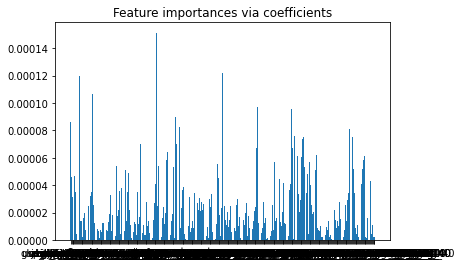

In [8]:
ridge_fit = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x_train, y_train)
importance = np.abs(ridge_fit.coef_)
feature_names = np.array(x_train.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

### Sequential selection

In [169]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
sfs_forward = SequentialFeatureSelector(
    ridge_fit, n_features_to_select=15, direction="forward"
).fit(x_train, y_train)

In [170]:
feature_names[sfs_forward.get_support()]

array(['Gold Vol', 'EURUSD 1M Vol', 'Gold',
       'Global Inflation-linked debt', 'iTraxx Europe 5Yr', 'JPY',
       'GTJPY10YR Corp                                                  ',
       'EquityBond premia', 'Credit Spread A',
       'EM Economic Activity Surprise',
       'China Economic Policy Uncertainty', 'IWM',
       'MSCI USA Momentum Index', 'MSCI USA Enhanced Value Index',
       'Copper 1 year carry'], dtype=object)

### Feature selection based on importance

In [10]:
sfm = SelectFromModel(ridge_fit, threshold=np.sort(importance)[-15]).fit(x_train, y_train)
feature_names[sfm.get_support()]

/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: divide by zero encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


array(['vix', 's&p_500_vrp', 'cdx_ig_5yr', 's&p_500_ret', 'gold_ret',
       'jpy_ret', 'asian_currency_ret', 'fed_target_rate_ret',
       'v2x_mv_10', 'v2x_mv_40', 'cdx_hy_5yr_mv_10',
       'gtjpy3mo_corp_mv_40', 'em_economic_activity_surprise_mv_40',
       'v2x_rolling_10', 'move_rolling_10'], dtype=object)

## Prophet on entire data

In [28]:

df_model_all = df_all.rename(columns={"date": "ds", 
                                      "value_1d_fwd_rel_ret_next": "y"})

In [29]:
from fbprophet import Prophet
selected_vars = feature_names[sfm.get_support()]
m_all = Prophet(growth = "linear", weekly_seasonality=True, yearly_seasonality=True)
for var in selected_vars:
    m_all.add_regressor(var)

In [30]:
m_all.fit(df_model_all)
fcst = m_all.predict(df_model_all)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -174.933
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7613.95   0.000435926       117.161      0.9186      0.9186      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7616.88   0.000104884       77.6999           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       7616.89   3.32351e-07       70.0104      0.3624           1      285   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


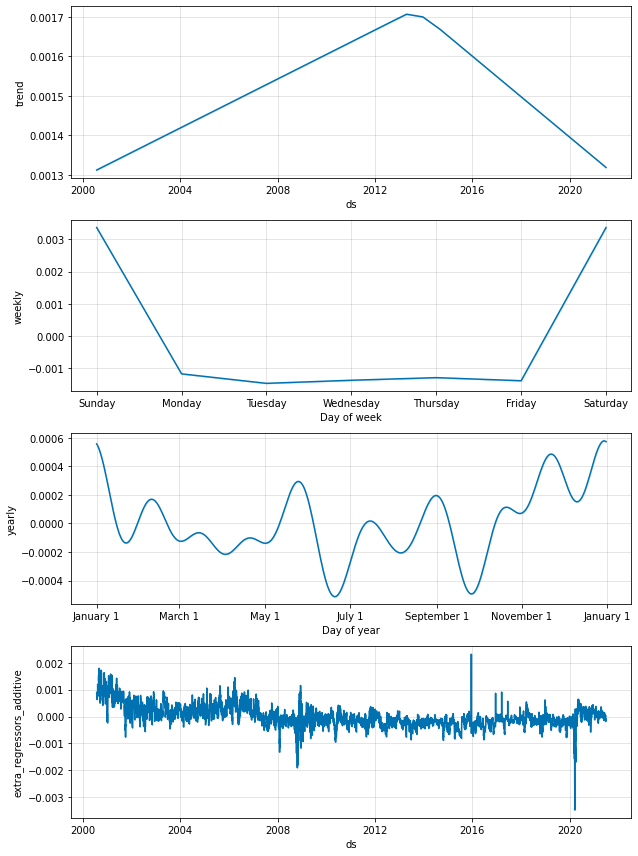

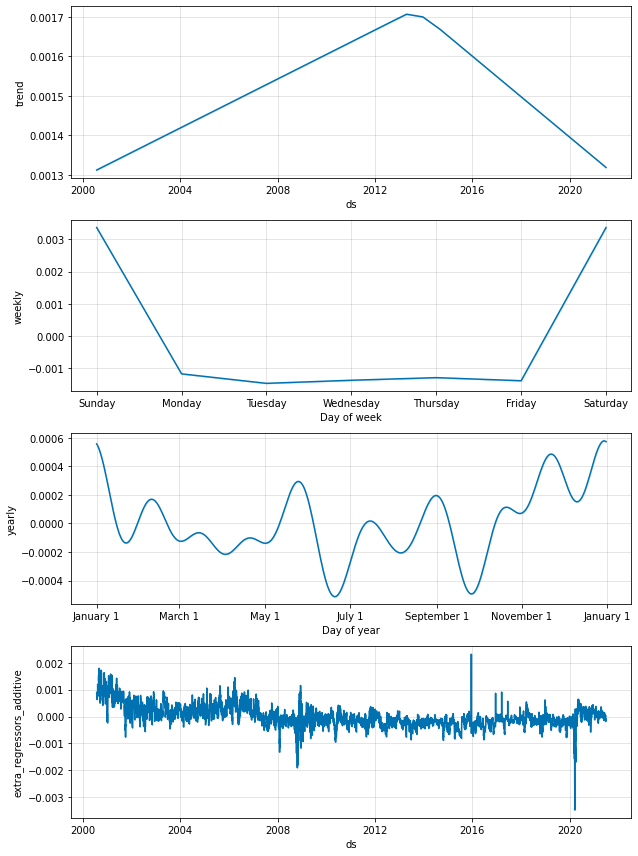

In [32]:
m_all.plot_components(fcst)

## Prophet on only training data

In [53]:

m = Prophet(growth = "linear", weekly_seasonality=True, yearly_seasonality=True)
for var in selected_vars:
    m.add_regressor(var)

In [54]:
df_train["date"] = test_dates
df_train["value_1d_fwd_rel_ret"] = y_train
df_model = df_train.rename(columns={"date": "ds", "value_1d_fwd_rel_ret": "y"})

In [55]:
m.fit(df_model)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -37.7438


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5359.74   0.000294746       115.212           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       5360.79   0.000500014       126.955   5.251e-06       0.001      235  LS failed, Hessian reset 
     199       5360.97   2.27979e-05        84.612           1           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5360.97   1.24411e-07       87.1826      0.2847           1      306   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [56]:
df_test = pd.read_csv(model_data_dir / "test_regression.csv").rename({"date": "ds"}, axis=1)
df_test.head()

,ds,vix,v2x,move,gold_vol,jpm_global_fx_vol,jpm_g7_fx_vol,jpm_em_fx_vol,eurusd_1m_vol,usdjpy_1m_vol,...,copper_1_year_carry_mv_40,vix_rolling_10,vix_rolling_40,month,year,day,weekday,sc_1d_fwd_rel_ret,mom_1d_fwd_rel_ret,value_1d_fwd_rel_ret
0,2014-01-02,-0.6310,-0.4639,-0.4057,-0.0268,-0.2952,-0.3471,-0.1972,-0.5258,-0.1018,...,-0.8773,-0.5752,-0.6356,1,2014,2,3,0.005416,-0.000329,0.002091
1,2014-01-03,-0.6835,-0.5551,-0.4266,-0.0695,-0.3454,-0.4060,-0.2796,-0.5972,-0.0471,...,-0.8740,-0.5770,-0.6361,1,2014,3,4,-0.005597,-0.000251,0.000522
2,2014-01-06,-0.7070,-0.5388,-0.5184,-0.0797,-0.4723,-0.6063,-0.2763,-0.7552,-0.1670,...,-0.8707,-0.6125,-0.6407,1,2014,6,0,0.002269,0.002999,0.000093
3,2014-01-07,-0.7775,-0.6347,-0.3936,-0.1085,-0.4988,-0.6259,-0.3652,-0.8068,-0.2700,...,-0.8676,-0.6235,-0.6385,1,2014,7,1,0.001520,0.007639,0.002141
4,2014-01-08,-0.7831,-0.6176,-0.3452,-0.0899,-0.4752,-0.5945,-0.3586,-0.7861,-0.2249,...,-0.8646,-0.6186,-0.6383,1,2014,8,2,-0.000087,0.001010,0.002480


/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


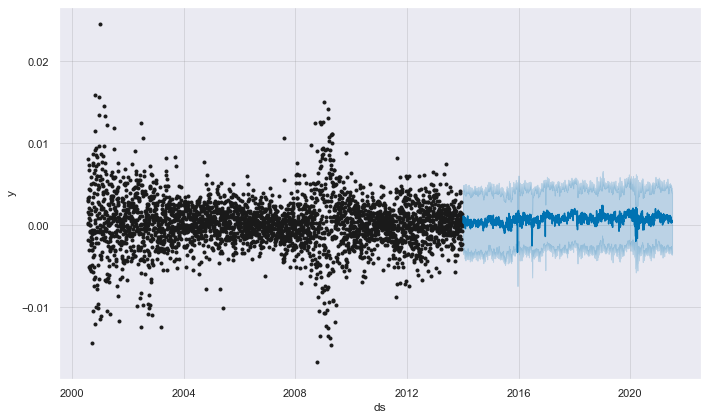

In [57]:
forecast = m.predict(df_test)
fig1 = m.plot(forecast)

<AxesSubplot:xlabel='ds', ylabel='price'>

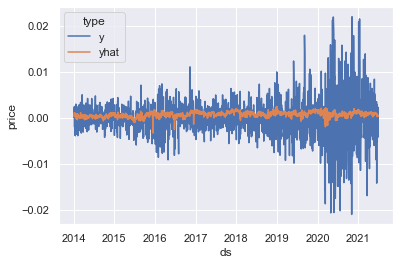

In [59]:
import seaborn as sns
sns.set_theme(style="darkgrid")

df_preds = forecast.assign(y = df_test["value_1d_fwd_rel_ret"])[["ds", "y", "yhat"]]
plot_data = df_preds.melt(id_vars="ds", var_name="type", value_name="price")

# Plot the responses for different events and regions
sns.lineplot(x="ds", y="price",
             hue="type",
             data=plot_data)

/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


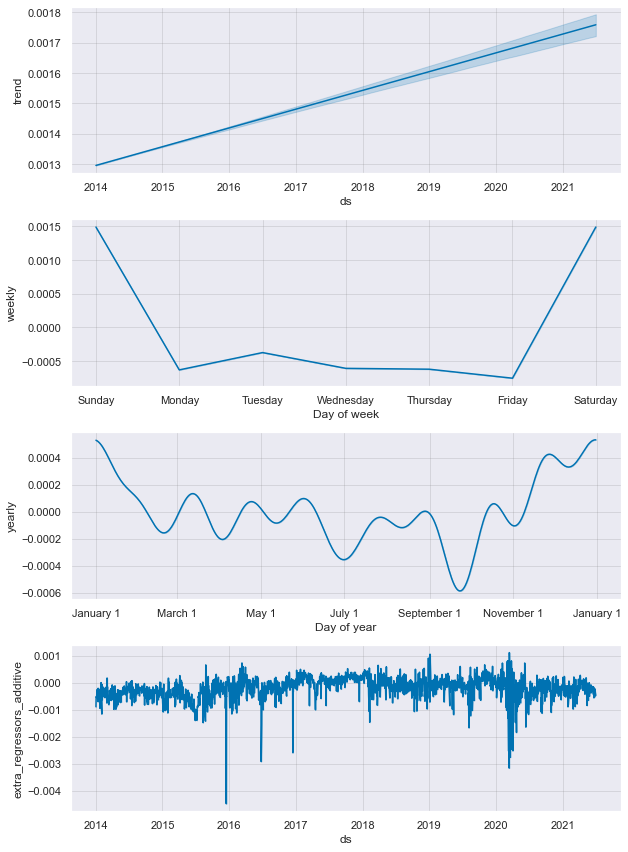

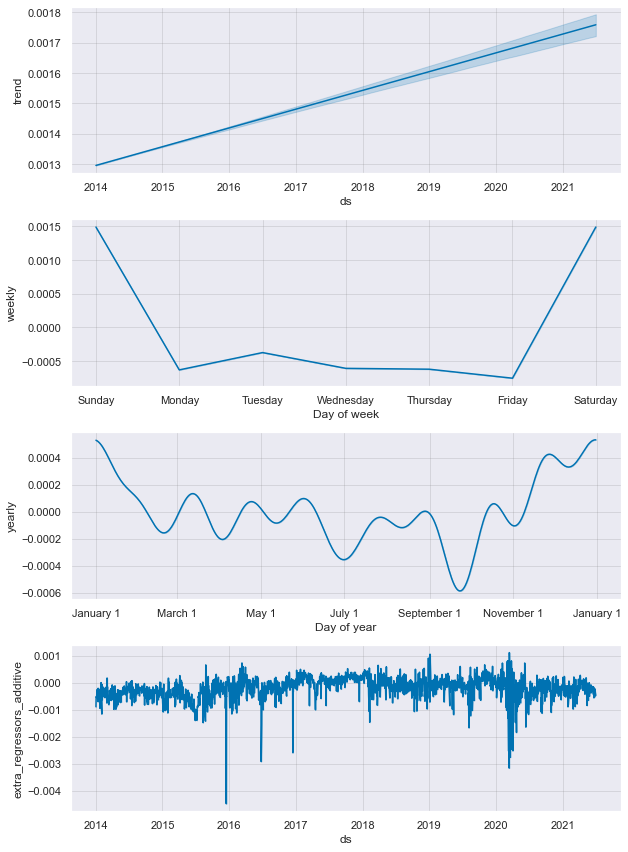

In [60]:
m.plot_components(forecast)

In [61]:
# mean absolute relative error
np.abs((df_preds["y"] - df_preds["yhat"])).mean()

0.0029073260040458114